<a href="https://colab.research.google.com/github/dzulwulann/Hotel_performance/blob/main/Investigate_Hotel_Bussines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data preprocessing**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing Relevant Library

In [2]:
import pandas as pd
import numpy as np


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Data set

In [4]:
#import file data
hotel_bookings = pd.read_csv('/content/drive/MyDrive/RAKAMIN/Investigate Hotel Bussines/hotel_bookings_data.csv')

In [5]:
#Getting brief information from dataset
hotel_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
#getting contains data set
hotel_bookings.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,0,No Deposit,304.0,NaN,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out
5,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out
6,Resort Hotel,0,0,2017,September,27,1,0,2,2,...,0,No Deposit,NaN,NaN,0,Personal,107.0,0,0,Check-Out
7,Resort Hotel,0,9,2017,September,27,1,0,2,2,...,0,No Deposit,303.0,NaN,0,Personal,103.0,0,1,Check-Out
8,Resort Hotel,1,85,2017,September,27,1,0,3,2,...,0,No Deposit,240.0,NaN,0,Personal,82.0,0,1,Canceled
9,Resort Hotel,1,75,2017,September,27,1,0,3,2,...,0,No Deposit,15.0,NaN,0,Personal,105.5,0,0,Canceled


In [7]:
hotel_bookings.isnull().any()

,0
hotel,False
is_canceled,False
lead_time,False
arrival_date_year,False
arrival_date_month,False
arrival_date_week_number,False
arrival_date_day_of_month,False
stays_in_weekend_nights,False
stays_in_weekdays_nights,False
adults,False


What do we get from brief data set info?



*  We have 119390 rows of data
*  Dataset contains 29 columns/features
* There are missing value in some columns/features such as **children**,**city**, **agent**, and **company**
* Datatype for features **children** convert from float to int.
* The rest of columns have correct datatype, however, it needs to be converted for analysis inquiry  
* All values are related to each column




## Handling Missing Value

In [8]:
#replacing null value for feature children
hotel_bookings['children'] = hotel_bookings['children'].fillna(0.0)


In [9]:
#replacing null value for city
hotel_bookings['city'] = hotel_bookings['city'].fillna('Unknown')

In [10]:
#replacing null value for agent
hotel_bookings['agent'] = hotel_bookings['agent'].fillna(0)

In [11]:
#replacing null value for company
hotel_bookings['company'] = hotel_bookings['company'].fillna(0)

In [12]:
#Checking is there any null value
hotel_bookings.isnull().any()

,0
hotel,False
is_canceled,False
lead_time,False
arrival_date_year,False
arrival_date_month,False
arrival_date_week_number,False
arrival_date_day_of_month,False
stays_in_weekend_nights,False
stays_in_weekdays_nights,False
adults,False


In [13]:
hotel_bookings['meal'].unique()

array(['Breakfast', 'Full Board', 'Dinner', 'No Meal', 'Undefined'],
      dtype=object)

In [14]:
#Replacing 'undefined' value to 'No Meal'
hotel_bookings['meal'] = hotel_bookings['meal'].replace(['Undefined'], 'No Meal')


##Eliminate unnecessary rows

In [15]:
#make new columns to sum total of the guests
hotel_bookings['guest']=hotel_bookings['adults']+hotel_bookings['children']+hotel_bookings['babies']

#figuring out data with 0 guest
print("Data with 0 guest: {0} out of {1} all data".format(hotel_bookings[hotel_bookings['guest'] == 0].shape[0], hotel_bookings.shape[0]))
hotel_prep = hotel_bookings[hotel_bookings['guest'] > 0].copy()
hotel_prep.shape

Data with 0 guest: 180 out of 119390 all data


(119210, 30)

##Analyze number of booking by accomodation type

In [62]:
# Group by hotel, year, and month and count bookings
hotel_type = hotel_prep.copy()
booking_counts = hotel_type.groupby(['hotel', 'arrival_date_month','arrival_date_year']).size().reset_index(name='booking_count')
booking_counts.columns = ['hotel', 'month', 'year', 'booking_count']

print(booking_counts)

           hotel      month  year  booking_count
0     City Hotel      April  2018           2365
1     City Hotel      April  2019           2585
2     City Hotel     August  2018           3921
3     City Hotel     August  2019           3964
4     City Hotel   December  2017           3382
5     City Hotel   December  2018           4212
6     City Hotel   February  2017           1649
7     City Hotel   February  2018           2465
8     City Hotel    January  2017           1233
9     City Hotel    January  2018           3103
10    City Hotel       July  2018           3673
11    City Hotel       July  2019           4548
12    City Hotel       June  2018           3558
13    City Hotel       June  2019           3911
14    City Hotel      March  2018           1364
15    City Hotel      March  2019           2366
16    City Hotel        May  2018           3041
17    City Hotel        May  2019           3393
18    City Hotel   November  2017           3524
19    City Hotel   N

In [63]:
# Group by 'hotel' and 'month', then calculate the average of 'booking_count'
average_bookings = booking_counts.groupby(['hotel', 'month'])['booking_count'].mean().reset_index()

# Rename the column for clarity
average_bookings.rename(columns={'booking_count': 'average_booking_count'}, inplace=True)

# Display the result
print(average_bookings)



           hotel      month  average_booking_count
0     City Hotel      April            2475.000000
1     City Hotel     August            3942.500000
2     City Hotel   December            3797.000000
3     City Hotel   February            2057.000000
4     City Hotel    January            2168.000000
5     City Hotel       July            4110.500000
6     City Hotel       June            3734.500000
7     City Hotel      March            1865.000000
8     City Hotel        May            3217.000000
9     City Hotel   November            3696.000000
10    City Hotel    October            2989.000000
11    City Hotel  September            2690.333333
12  Resort Hotel      April            1551.000000
13  Resort Hotel     August            1522.000000
14  Resort Hotel   December            1776.500000
15  Resort Hotel   February            1322.500000
16  Resort Hotel    January            1217.500000
17  Resort Hotel       July            1779.500000
18  Resort Hotel       June    

In [64]:
#sort booking count by months
# Define the month order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Convert 'month' to a categorical type with the specified order
average_bookings['month'] = pd.Categorical(average_bookings['month'], categories=month_order, ordered=True)
average_bookings['arv_month'] = average_bookings['month'].str[:3]
# Sort by 'hotel' and 'month'
average_bookings = average_bookings.sort_values(['hotel', 'month']).reset_index(drop=True)

print(average_bookings)


           hotel      month  average_booking_count arv_month
0     City Hotel    January            2168.000000       Jan
1     City Hotel   February            2057.000000       Feb
2     City Hotel      March            1865.000000       Mar
3     City Hotel      April            2475.000000       Apr
4     City Hotel        May            3217.000000       May
5     City Hotel       June            3734.500000       Jun
6     City Hotel       July            4110.500000       Jul
7     City Hotel     August            3942.500000       Aug
8     City Hotel  September            2690.333333       Sep
9     City Hotel    October            2989.000000       Oct
10    City Hotel   November            3696.000000       Nov
11    City Hotel   December            3797.000000       Dec
12  Resort Hotel    January            1217.500000       Jan
13  Resort Hotel   February            1322.500000       Feb
14  Resort Hotel      March            1095.500000       Mar
15  Resort Hotel      Ap

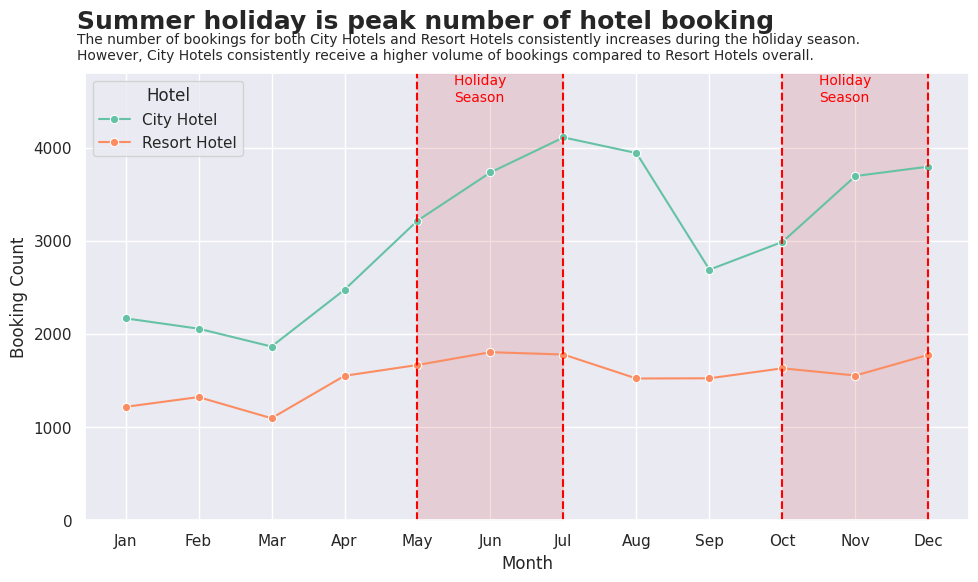

<Figure size 640x480 with 0 Axes>

In [65]:
# from matplotlib.patches import Rectangle

# Plotting with seaborn
sns.set_style("dark")
plt.figure(figsize=(10, 6))
plt.grid()
plt.ylim(0, 4800) # membatasi y axis
sns.lineplot(data=average_bookings, x='arv_month', y='average_booking_count', hue='hotel', marker='o',palette='Set2')

plt.text(-0.009, 1.1, 'Summer holiday is peak number of hotel booking', transform=plt.gca().transAxes, ha='left', fontsize=18, fontweight='bold')
plt.text(-0.009, 1.03, 'The number of bookings for both City Hotels and Resort Hotels consistently increases during the holiday season. \nHowever, City Hotels consistently receive a higher volume of bookings compared to Resort Hotels overall.', transform=plt.gca().transAxes, ha='left', fontsize=10)

plt.axvline(4, ls='--', color='red')
plt.axvline(6, ls='--', color='red')
plt.text(x=4.5, y=4500, s='Holiday \nSeason', fontsize=10, color='red')
plt.stackplot(np.arange(4,7,1), [[4800]], color='indianred', alpha=0.2)

plt.axvline(9, ls='--', color='red')
plt.axvline(11, ls='--', color='red')
plt.text(x=9.5, y=4500, s='Holiday \nSeason', fontsize=10, color='red')
plt.stackplot(np.arange(9,12,1), [[4800]], color='indianred', alpha=0.2)

plt.xlabel('Month')
plt.ylabel('Booking Count')
plt.legend(title='Hotel', loc='upper left')


plt.tight_layout()
plt.show()

plt.savefig('/content/drive/MyDrive/RAKAMIN/Investigate Hotel Bussines/peak bookings.png', dpi=200)

##Analysis of the Impact of Length of Stay on Cancellations

In [56]:
hotel_stay = hotel_prep.copy()
hotel_stay['stay_duration'] = hotel_stay['stays_in_weekend_nights'] + hotel_stay['stays_in_weekdays_nights']

In [57]:
descriptive_stats = hotel_stay['stay_duration'].describe()
print(descriptive_stats)

count    119210.000000
mean          3.426248
std           2.540692
min           0.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          69.000000
Name: stay_duration, dtype: float64


<Axes: xlabel='stay_duration', ylabel='Count'>

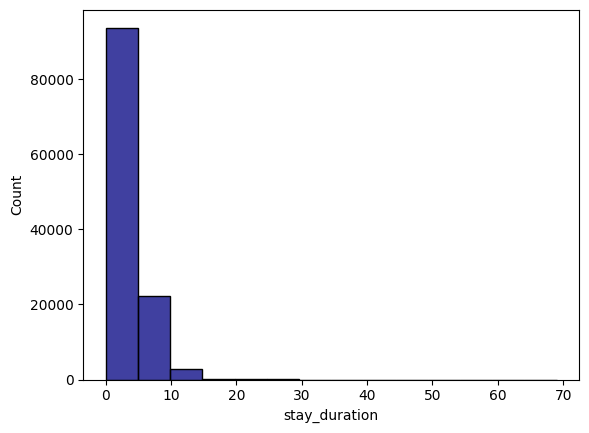

In [58]:
#Plot the distribution of the long stay duration
sns.histplot(data=hotel_stay, x='stay_duration',binwidth=5, color="navy")

Based on histogram above, it shows that the long of stay is right-skewed. So I will group long stay duration to be grouped by the number of stay duration. According to the histogram the range long of stay were about 0 - until more than 15. So we will focus more on grouping in that range. We will have **0-15, 15-21, and >21**

In [59]:
#Grouping stay duration
hotel_stay['stay_duration'] = np.where(hotel_stay['stay_duration']>21, 21, np.where(hotel_stay['stay_duration']>14, 15, hotel_stay['stay_duration']))

In [60]:
cancel_agg = hotel_stay.groupby(['hotel','stay_duration','is_canceled',]).size().reset_index(name='canceled_count')
cancel_pvt = cancel_agg.pivot_table(index =['hotel', 'stay_duration'], columns='is_canceled', values='canceled_count').reset_index()
# Rename the columns for clarity
cancel_pvt.rename(columns={0: 'Not_Canceled', 1: 'Canceled'}, inplace=True)
cancel_pvt['cancel_precentage'] = (cancel_pvt['Canceled']/(cancel_pvt['Canceled']+cancel_pvt['Not_Canceled']))*100

cancel_pvt

is_canceled,hotel,stay_duration,Not_Canceled,Canceled,cancel_precentage
0,City Hotel,0,251.0,13.0,4.924242
1,City Hotel,1,9155.0,4103.0,30.947353
2,City Hotel,2,10983.0,10432.0,48.713519
3,City Hotel,3,11889.0,9482.0,44.368537
4,City Hotel,4,7694.0,4853.0,38.678569
5,City Hotel,5,3210.0,1775.0,35.606820
6,City Hotel,6,1111.0,938.0,45.778429
7,City Hotel,7,1245.0,808.0,39.357038
8,City Hotel,8,205.0,176.0,46.194226
9,City Hotel,9,119.0,93.0,43.867925


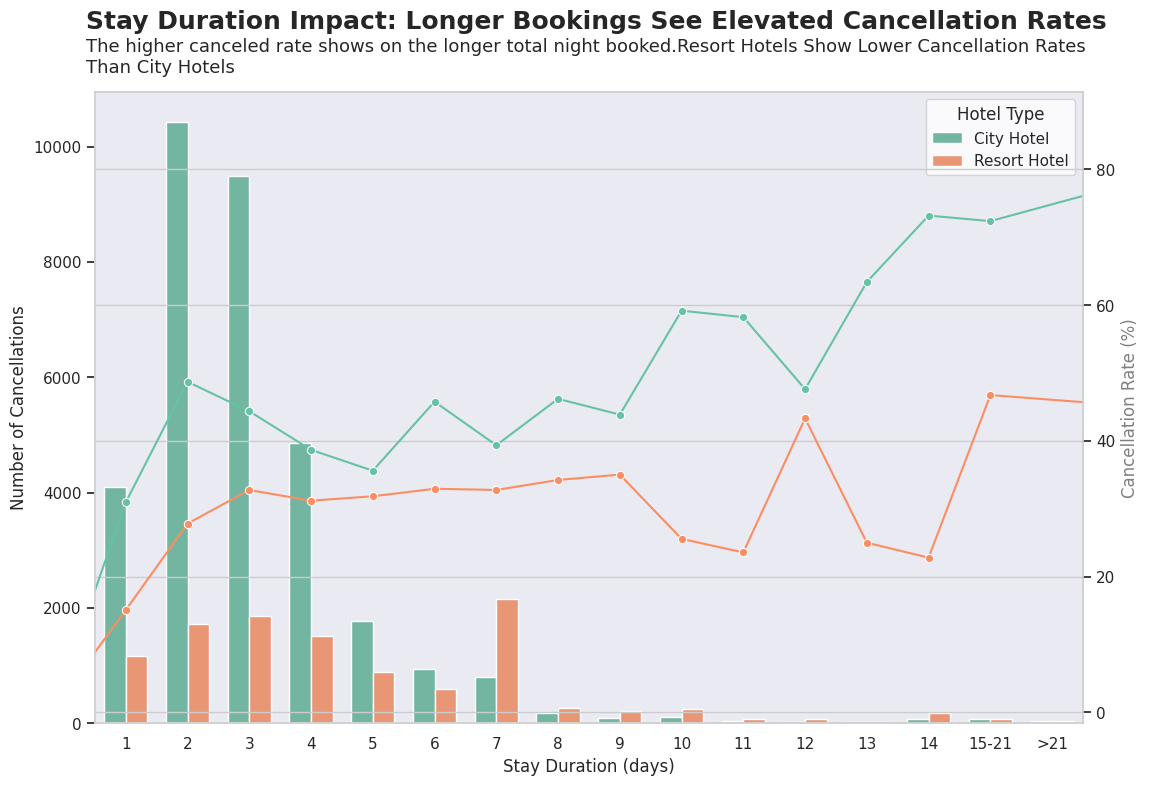

In [75]:
fig,ax1 = plt.subplots(figsize=(12,8))
sns.set_theme(style='whitegrid')

sns.barplot(data=cancel_pvt, x='stay_duration', y='Canceled', hue='hotel', palette='Set2', width= 0.7,ax=ax1)

ax2 = ax1.twinx()

sns.lineplot(data=cancel_pvt, x='stay_duration', y='cancel_precentage', hue='hotel', marker='o', ax=ax2, palette='Set2', legend=False)
ax1.set_xlabel('Stay Duration (days)', fontsize=12)
ax1.set_ylabel('Number of Cancellations', fontsize=12)
ax2.set_ylabel('Cancellation Rate (%)', fontsize=12, color='gray')
plt.xticks(range(0,17,1), labels=[str(x) for x in range(0,15,1)]+["15-21",">21"])

plt.text(-0.009, 1.1, 'Stay Duration Impact: Longer Bookings See Elevated Cancellation Rates ', transform=plt.gca().transAxes, ha='left', fontsize=18, fontweight='bold')
plt.text(-0.009, 1.03, 'The higher canceled rate shows on the longer total night booked.Resort Hotels Show Lower Cancellation Rates \nThan City Hotels', transform=plt.gca().transAxes, ha='left', fontsize=13)
# Combine legends
handles1, labels1 = ax1.get_legend_handles_labels()
ax1.legend(handles1, labels1, title='Hotel Type', loc='upper right')
plt.xlim(0.5, 16.5)

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/RAKAMIN/Investigate Hotel Bussines/stay duration cancel.png', dpi=200)
plt.show()



##Analyze the impact of lead time on cancellations rate

<Axes: xlabel='lead_time', ylabel='Count'>

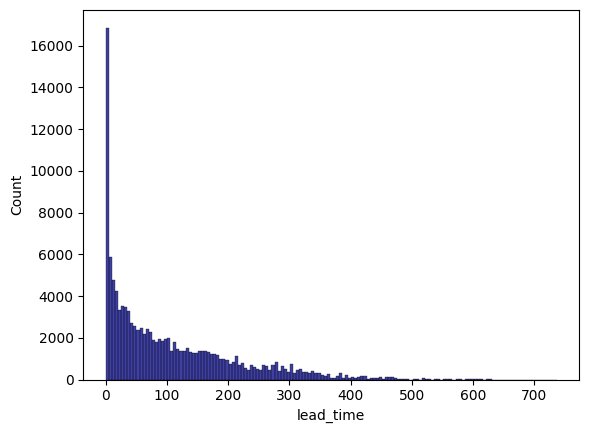

In [16]:
lead_time_data = hotel_prep.copy()
sns.histplot(data=lead_time_data, x='lead_time',binwidth=5, color="navy")

Based on the histogram above, the distribution of the lead time data is right-skewed. The lead time is daily form, so I will group them by 30 days or we can categorized it to be monthly.

In [24]:
lead_time_data['lead_time_category'] = np.where(lead_time_data['lead_time']>400, 401, lead_time_data['lead_time'])
bins = list(np.arange(0, max(lead_time_data['lead_time_category']) + 30, 30))
# Generate labels automatically
labels = [f'{bins[i]}-{bins[i+1]}' for i in range(len(bins)-1)]
lead_time_data['lead_time_category'] = pd.cut(lead_time_data['lead_time_category'], bins=bins, labels=labels, right=False)

In [25]:
lead_time_agg = lead_time_data.groupby(['hotel','lead_time_category','is_canceled',]).size().reset_index(name='canceled_count')
lead_time_pvt = lead_time_agg.pivot_table(index =['hotel', 'lead_time_category'], columns='is_canceled', values='canceled_count').reset_index()
lead_time_pvt.rename(columns={0: 'Not_Canceled', 1: 'Canceled'}, inplace=True)
lead_time_pvt['total_book'] = lead_time_pvt['Not_Canceled'] + lead_time_pvt['Canceled']
lead_time_pvt['pct_canceled'] = (lead_time_pvt['Canceled']/lead_time_pvt['total_book'])*100

lead_time_pvt

<ipython-input-25-2ee0ba845eff>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lead_time_agg = lead_time_data.groupby(['hotel','lead_time_category','is_canceled',]).size().reset_index(name='canceled_count')
<ipython-input-25-2ee0ba845eff>:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  lead_time_pvt = lead_time_agg.pivot_table(index =['hotel', 'lead_time_category'], columns='is_canceled', values='canceled_count').reset_index()


is_canceled,hotel,lead_time_category,Not_Canceled,Canceled,total_book,pct_canceled
0,City Hotel,0-30,17809.0,5000.0,22809.0,21.921171
1,City Hotel,30-60,7330.0,4682.0,12012.0,38.977689
2,City Hotel,60-90,5255.0,3746.0,9001.0,41.617598
3,City Hotel,90-120,3996.0,3456.0,7452.0,46.376812
4,City Hotel,120-150,3058.0,2477.0,5535.0,44.751581
5,City Hotel,150-180,2435.0,2780.0,5215.0,53.307766
6,City Hotel,180-210,1863.0,1801.0,3664.0,49.153930
7,City Hotel,210-240,1246.0,1279.0,2525.0,50.653465
8,City Hotel,240-270,873.0,1265.0,2138.0,59.167446
9,City Hotel,270-300,686.0,1846.0,2532.0,72.906793


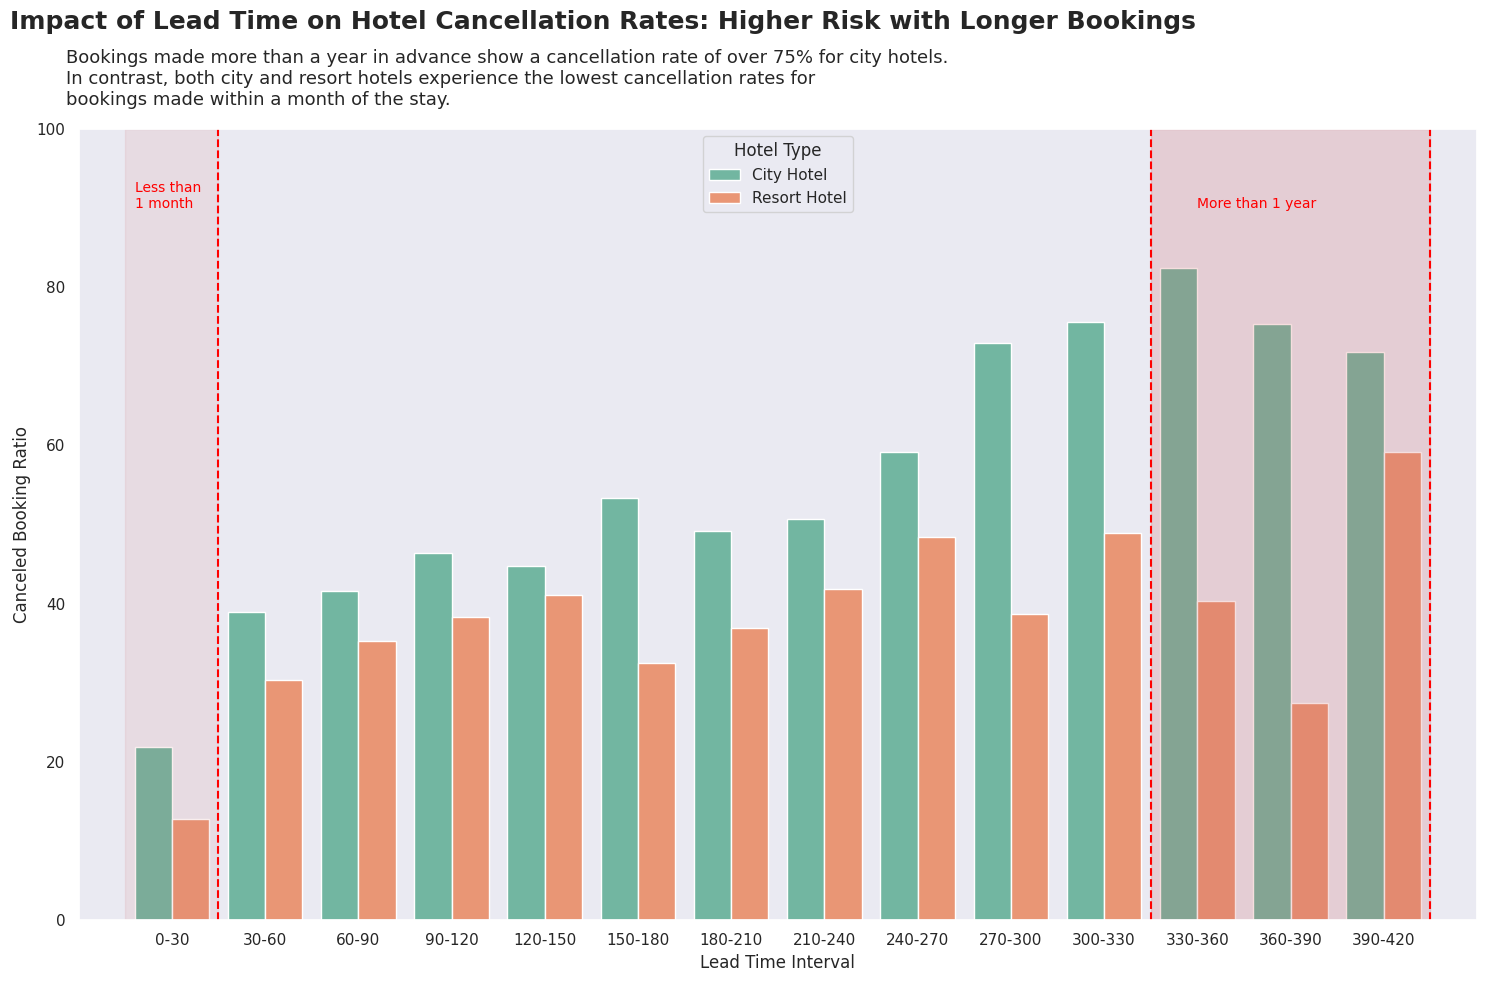

In [74]:

plt.figure(figsize=(15, 10))
sns.barplot(x='lead_time_category', y='pct_canceled', hue='hotel', data=lead_time_pvt, palette='Set2')
plt.xlabel('Lead Time Interval')
plt.ylabel('Canceled Booking Ratio')

# Add Title and Subtext
plt.suptitle('Impact of Lead Time on Hotel Cancellation Rates: Higher Risk with Longer Bookings',
             fontsize=18, fontweight='bold', ha='left', x=0.01, y=0.98)
plt.text(-0.009, 1.03,
         'Bookings made more than a year in advance show a cancellation rate of over 75% for city hotels. \n'
         'In contrast, both city and resort hotels experience the lowest cancellation rates for \n'
         'bookings made within a month of the stay.',
         transform=plt.gca().transAxes, ha='left', fontsize=13)

# Highlight specific regions using axvspan
plt.axvline(0.5, ls='--', color='red')
plt.text(x=-0.4, y=90, s='Less than \n1 month', fontsize=10, color='red')
plt.axvspan(-0.5, 0.5, color='indianred', alpha=0.1)

plt.axvline(10.5, ls='--', color='red')
plt.axvline(13.5, ls='--', color='red')
plt.text(x=11, y=90, s='More than 1 year', fontsize=10, color='red')
plt.axvspan(10.5, 13.5, color='indianred', alpha=0.2)

# Legend, Limits, and Layout
plt.legend(title='Hotel Type', loc='upper center')
plt.ylim(0, 100)
plt.xlim(-1, 14)

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/RAKAMIN/Investigate Hotel Bussines/lead time cancel.png', dpi=200)
plt.show()
